# week 1

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv(r"C:\Users\rijin\Downloads\HomePrice.csv")
df

,AREA,PRICE
0,2600,55000
1,3000,56500
2,3200,61000
3,3600,68000
4,4000,72000
5,5000,71000
6,2500,40000
7,2700,38000
8,1200,17000
9,5000,100000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   AREA    10 non-null     int64
 1   PRICE   10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [5]:
df.describe()

,AREA,PRICE
count,10.000000,10.000000
mean,3280.000000,57850.000000
std,1171.703413,22740.138278
min,1200.000000,17000.000000
25%,2625.000000,43750.000000
50%,3100.000000,58750.000000
75%,3900.000000,70250.000000
max,5000.000000,100000.000000


In [6]:
x=df.drop(['PRICE'],axis=1)
x

,AREA
0,2600
1,3000
2,3200
3,3600
4,4000
5,5000
6,2500
7,2700
8,1200
9,5000


In [7]:
y=df.PRICE
y

0     55000
1     56500
2     61000
3     68000
4     72000
5     71000
6     40000
7     38000
8     17000
9    100000
Name: PRICE, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [10]:
pred=model.predict(x_test)
pred

array([22786.00964852, 53358.71812543])

In [11]:
from sklearn.metrics import mean_squared_error,r2_score
print(mean_squared_error(y_test,pred))
print(r2_score(y_test,pred))

21672779.734121926
0.9444376741313971


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 4463.645761543765
MSE: 21672779.734121926
RMSE: 4655.403283725474
R2: 0.9444376741313971


In [13]:
model.score(x_train,y_train)

0.7580773007888078

In [14]:
model.score(x_test,y_test)

0.9444376741313971

In [15]:
df['area_squared']=df['AREA']**2
df

,AREA,PRICE,area_squared
0,2600,55000,6760000
1,3000,56500,9000000
2,3200,61000,10240000
3,3600,68000,12960000
4,4000,72000,16000000
5,5000,71000,25000000
6,2500,40000,6250000
7,2700,38000,7290000
8,1200,17000,1440000
9,5000,100000,25000000


In [16]:
x=df.drop(['PRICE'],axis=1)
x

,AREA,area_squared
0,2600,6760000
1,3000,9000000
2,3200,10240000
3,3600,12960000
4,4000,16000000
5,5000,25000000
6,2500,6250000
7,2700,7290000
8,1200,1440000
9,5000,25000000


In [17]:
y=df.PRICE
y

0     55000
1     56500
2     61000
3     68000
4     72000
5     71000
6     40000
7     38000
8     17000
9    100000
Name: PRICE, dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [20]:
pred=model.predict(x_test)
pred

array([ 2224.1780188 , 54586.22159799])

In [21]:
print(r2_score(y_test,pred))

0.7154462900276877


In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [23]:
scores = cross_val_score(model, x, y, cv=5)
print(scores)
print("Average score:", scores.mean())

[-1.13038147e+02 -2.90438196e-01 -1.77184145e+03 -1.41601056e+02
  4.64982999e-01]
Average score: -405.2612208174292


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [30]:
model = DecisionTreeRegressor()
params = {
    "max_depth": [2,3,4,5,6],
    "min_samples_split": [2,5,10]
}

grid = GridSearchCV(model, params, cv=5)
grid.fit(x, y)
print("Best parameters:", grid.best_params_)
print("Best score:", grid.best_score_)

Best parameters: {'max_depth': 2, 'min_samples_split': 10}
Best score: -347.51960791207


# week 2

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

In [32]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [36]:
print(r2_score(y_test,pred))

0.008100553686196776


In [37]:
for d in [2,3,4,5,6]:
    model = DecisionTreeRegressor(max_depth=d)
    model.fit(x_train,y_train)
    print(d,model.score(x_test, y_test))

2 0.016361338104648238
3 -0.21839448806281037
4 0.29594616247396255
5 0.29594616247396255
6 0.29594616247396255


In [38]:
from sklearn.ensemble import RandomForestRegressor

In [40]:
model = RandomForestRegressor(n_estimators=100)
model.fit(x_train, y_train)

RandomForestRegressor()

In [41]:
print("R2:", model.score(x_test, y_test))

R2: 0.03206729690754684


In [ ]:
# churn prediction

In [42]:
import numpy as np
import pandas as pd

In [43]:
df=pd.read_csv(r"C:\Users\rijin\Downloads\Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [44]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [46]:
df.shape

(7043, 21)

In [47]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [48]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [51]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [52]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [53]:
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')


In [54]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

In [55]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [58]:
df.dropna(inplace=True)

In [59]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [60]:
df['Churn']=df['Churn'].map({'Yes':1,'No':0})

In [61]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=le.fit_transform(df[col])

In [62]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [65]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [66]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7853589196872779


In [67]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[915 118]
 [184 190]]


In [69]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [70]:
from sklearn.tree import DecisionTreeClassifier

In [71]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [72]:
y_pred_dt = dt.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.728500355366027


In [74]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_dt))

[[836 197]
 [185 189]]


In [76]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [78]:
y_pred_dt = dt.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Accuracy: 0.7725657427149965
[[962  71]
 [249 125]]


In [80]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)


RandomForestClassifier(random_state=42)

In [81]:
y_pred_rf = rf.predict(x_test)

from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7846481876332623
[[934  99]
 [204 170]]


In [83]:
import pandas as pd

importance = rf.feature_importances_
features = x.columns
feat_imp = pd.Series(importance, index=features).sort_values(ascending=False)
print(feat_imp.head(5))

TotalCharges      0.152603
MonthlyCharges    0.149936
tenure            0.136431
customerID        0.126720
Contract          0.085540
dtype: float64


# fruad detect

In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\rijin\Downloads\creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [2]:
print(df.head())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
print(df.shape)

(284807, 31)


In [4]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

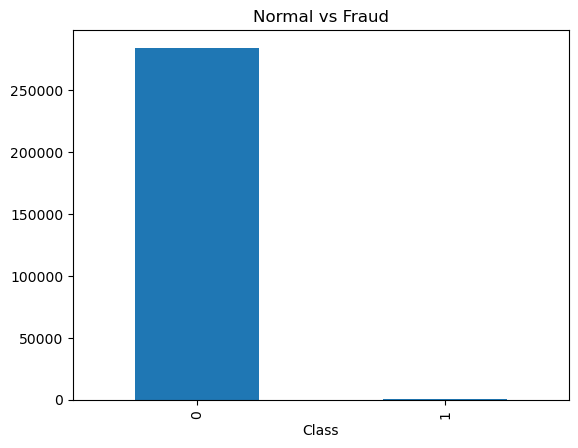

In [5]:
import matplotlib.pyplot as plt

df['Class'].value_counts().plot(kind='bar')
plt.title("Normal vs Fraud")
plt.show()

In [6]:
x = df.drop('Class', axis=1)
y = df['Class']

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [9]:
y_pred = model.predict(x_test)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56849    15]
 [   30    68]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.69      0.75        98

    accuracy                           1.00     56962
   macro avg       0.91      0.85      0.88     56962
weighted avg       1.00      1.00      1.00     56962



In [11]:
!pip install imbalanced-learn

In [12]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)

In [13]:
x_resampled, y_resampled = sm.fit_resample(x_train, y_train)

In [14]:
print(y_resampled.value_counts())

Class
0    227451
1    227451
Name: count, dtype: int64


In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_resampled,y_resampled)

LogisticRegression(max_iter=1000)

In [16]:
y_pred = model.predict(x_test)

In [17]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[55591  1273]
 [    9    89]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [21]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(x_resampled, y_resampled)

y_pred_rf = rf.predict(x_test)

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.83      0.83        98

    accuracy                           1.00     56962
   macro avg       0.92      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
import pandas as pd

importance = rf.feature_importances_
features = x.columns

feat_imp = pd.Series(importance, index=features).sort_values(ascending=False)
print(feat_imp.head(10))

V14    0.217013
V10    0.119797
V4     0.116789
V12    0.107501
V17    0.086248
V3     0.070860
V11    0.050472
V16    0.040096
V2     0.038845
V9     0.028277
dtype: float64


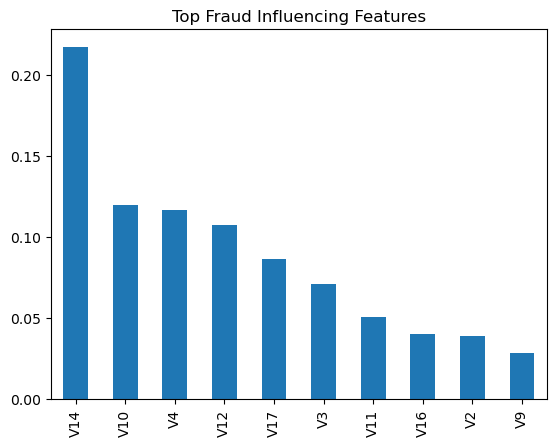

In [23]:
import matplotlib.pyplot as plt

feat_imp.head(10).plot(kind='bar')
plt.title("Top Fraud Influencing Features")
plt.show()

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(rf, param_grid, cv=3, scoring='f1', n_jobs=-1)

grid.fit(x_resampled, y_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='f1')

In [27]:
print("Best params:", grid.best_params_)

Best params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [28]:
best_rf = grid.best_estimator_

y_pred_best = best_rf.predict(x_test)

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.89      0.66        98

    accuracy                           1.00     56962
   macro avg       0.76      0.94      0.83     56962
weighted avg       1.00      1.00      1.00     56962

